   _id  Year                Offence  Punjab  Sindh    KP  Balochistan  \
0    1  2012                 Murder    6128   3726  2958          711   
1    2  2012      Attempt to Murder    7641   3732  2892          583   
2    3  2012  Kidnapping /Abduction   15699   3077  1052          386   
3    4  2012                Dacoity    2715   1341    60           98   
4    5  2012                Robbery   12181   4320   134          160   

   Islamabad  Railways  G.B  AJK  Pakistan  
0        120         6  102   95     13846  
1        146         9  163  172     15338  
2         70         6   32  288     20610  
3         22         1    8   12      4257  
4        177         5   26   78     17081  
Column names in the dataset: Index(['_id', 'Year', 'Offence', 'Punjab', 'Sindh', 'KP', 'Balochistan',
       'Islamabad', 'Railways', 'G.B', 'AJK', 'Pakistan'],
      dtype='object')


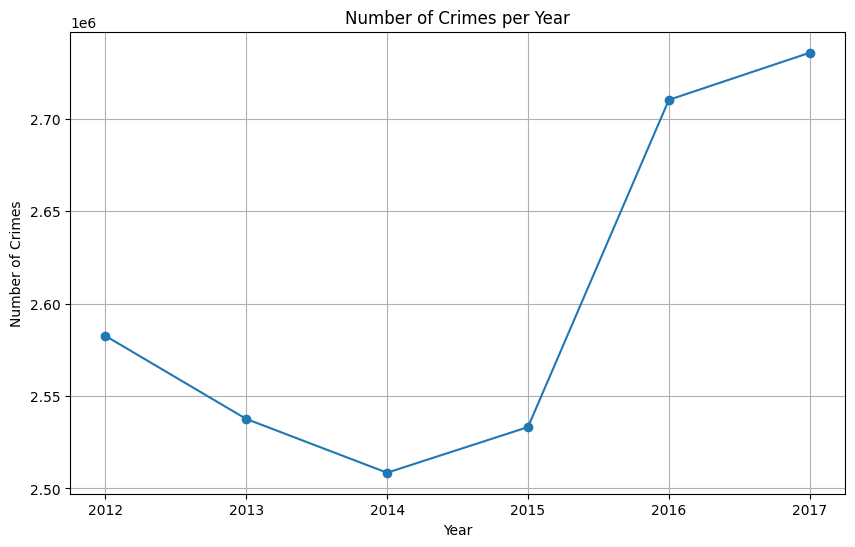

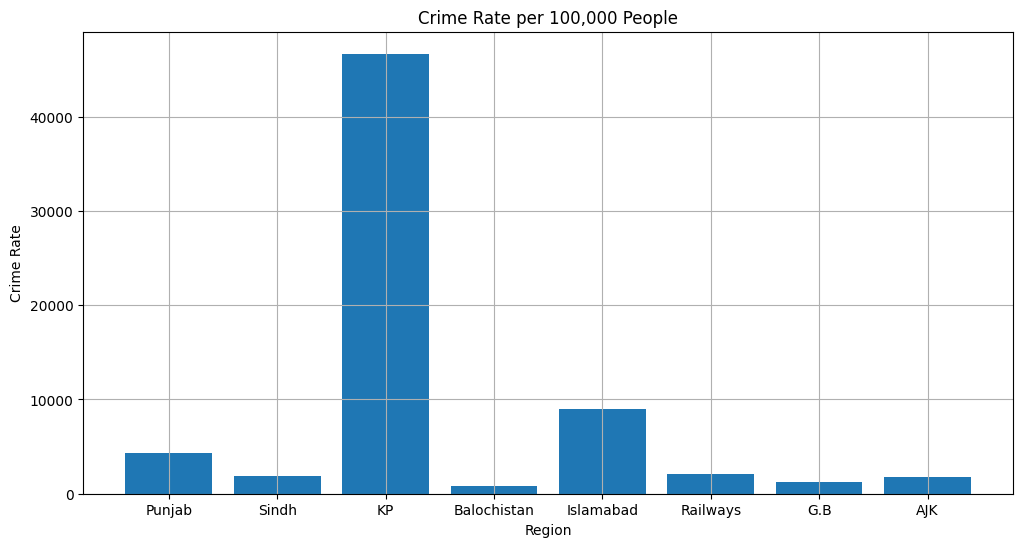

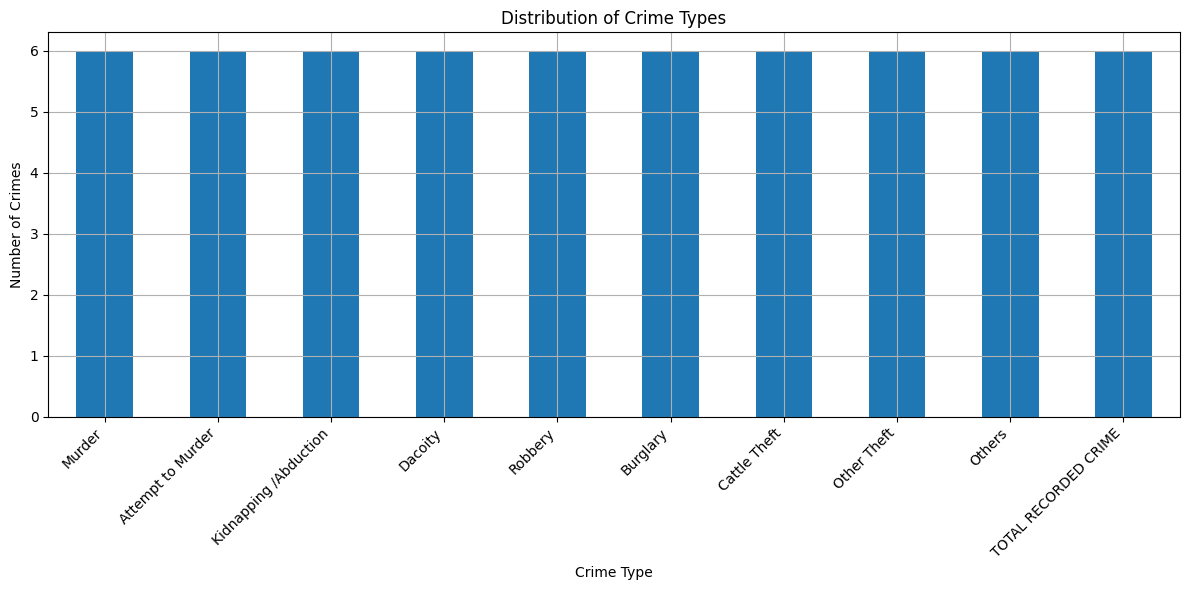

C:\Users\Khansa Malik\AppData\Local\Temp\ipykernel_12512\3790996320.py:87: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

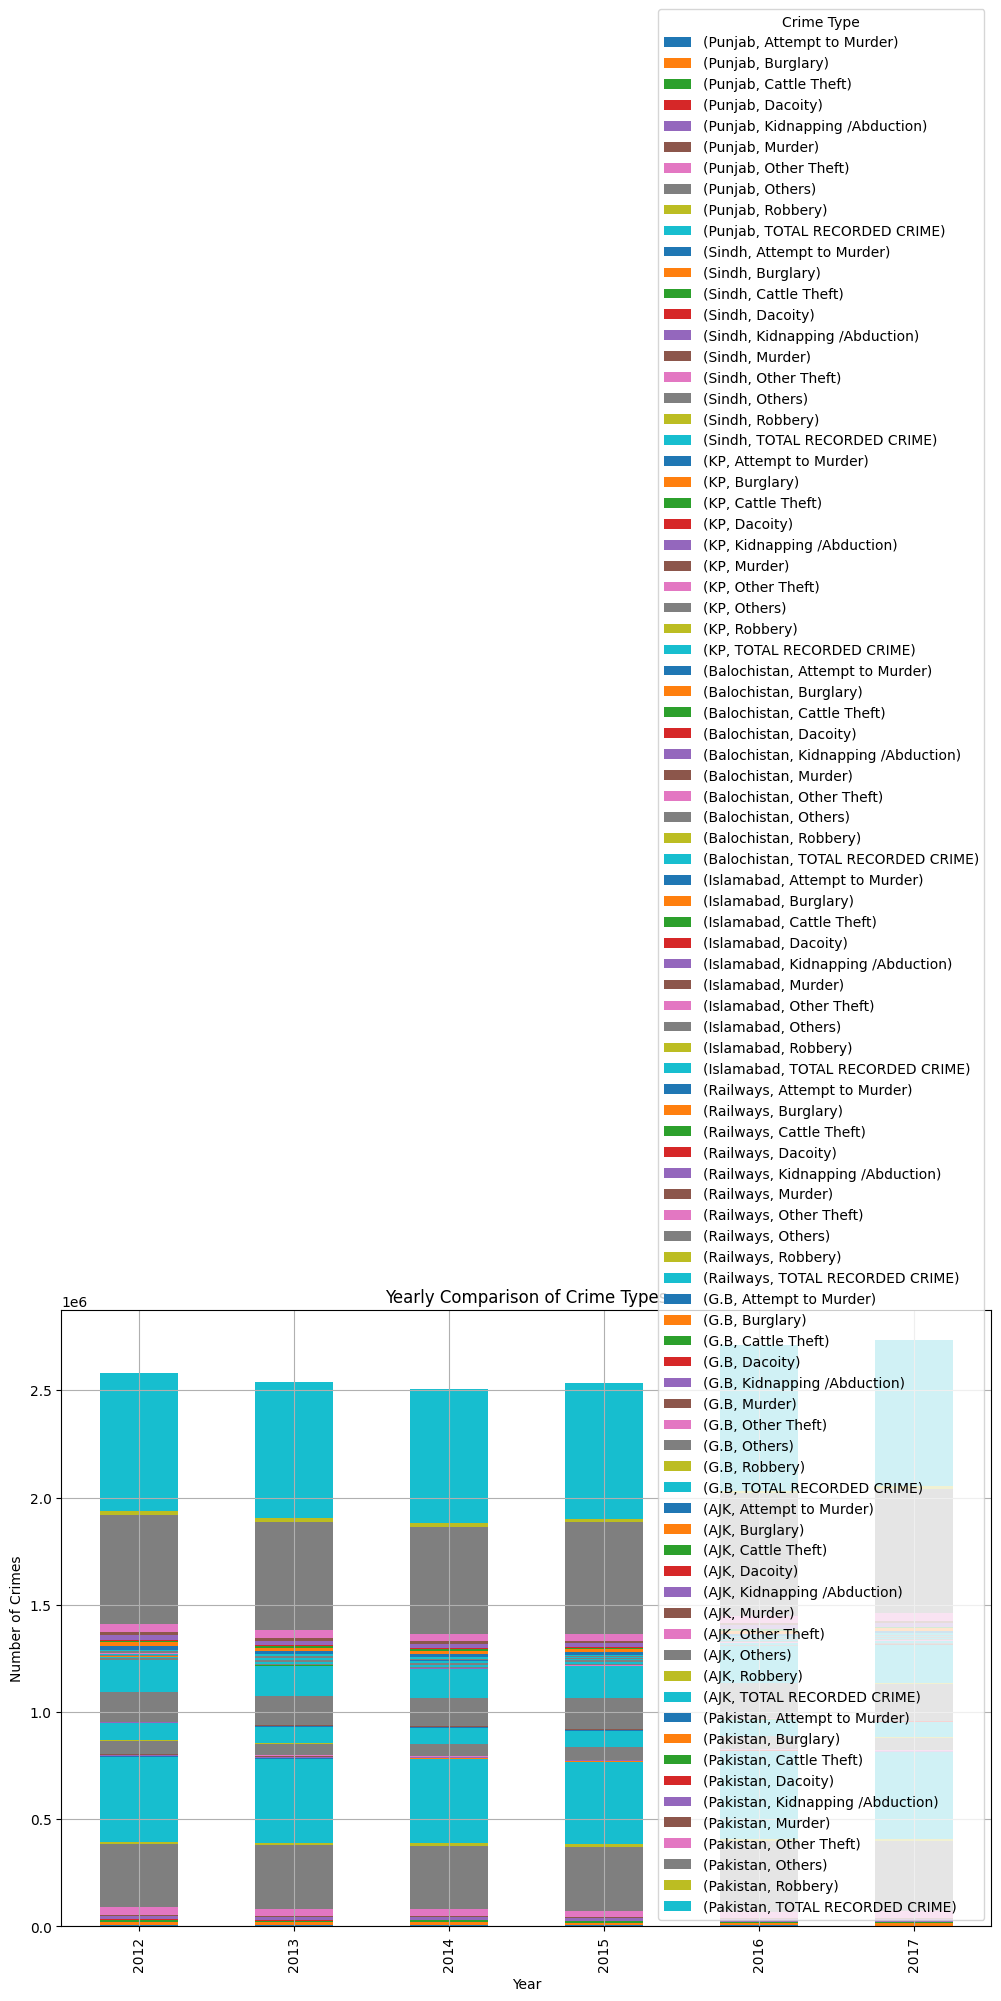

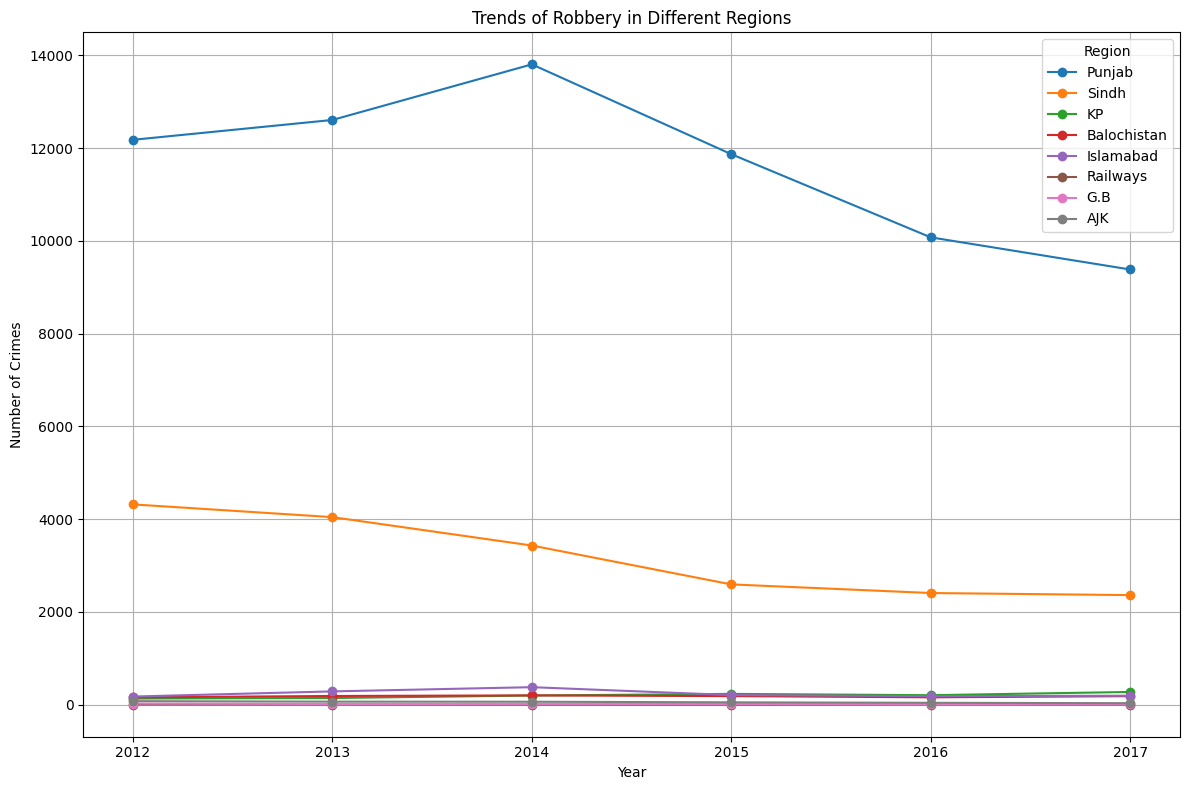

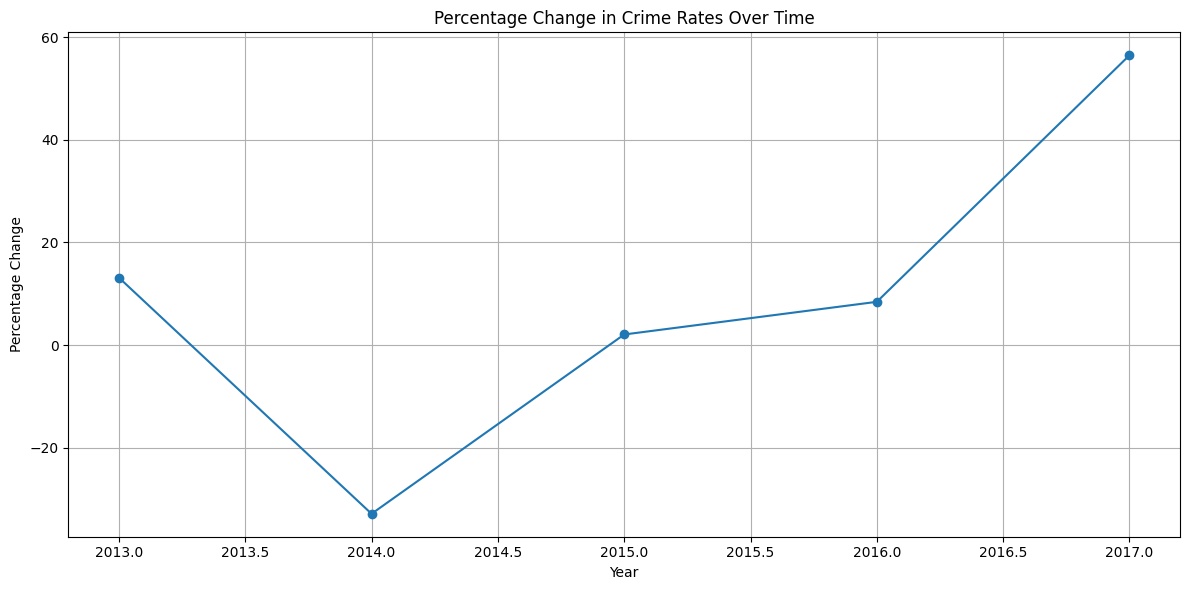

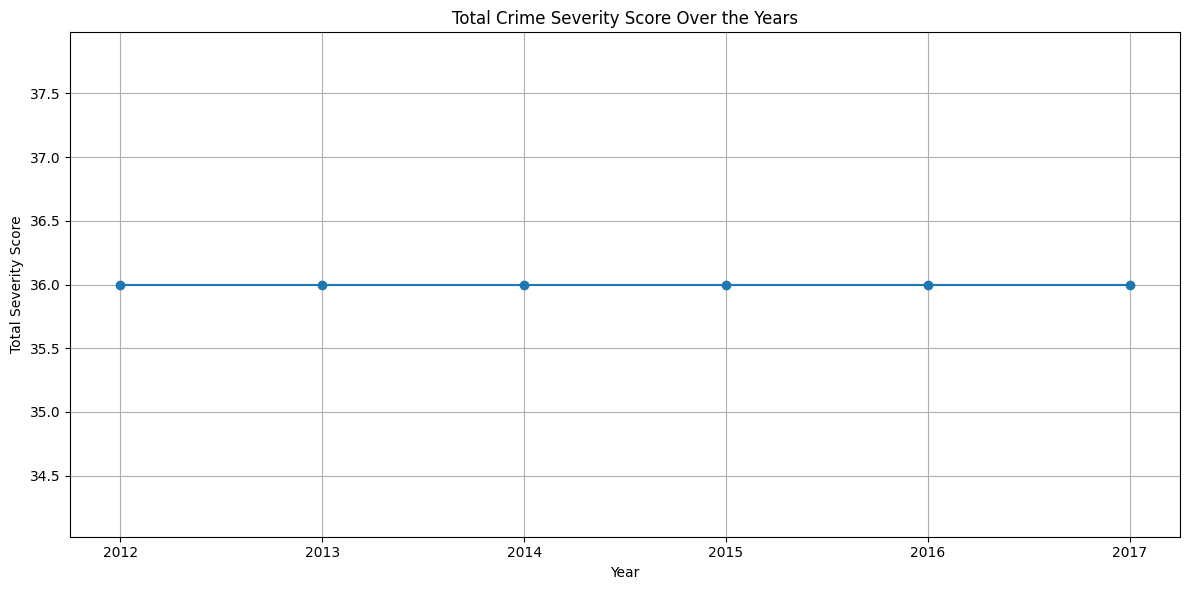

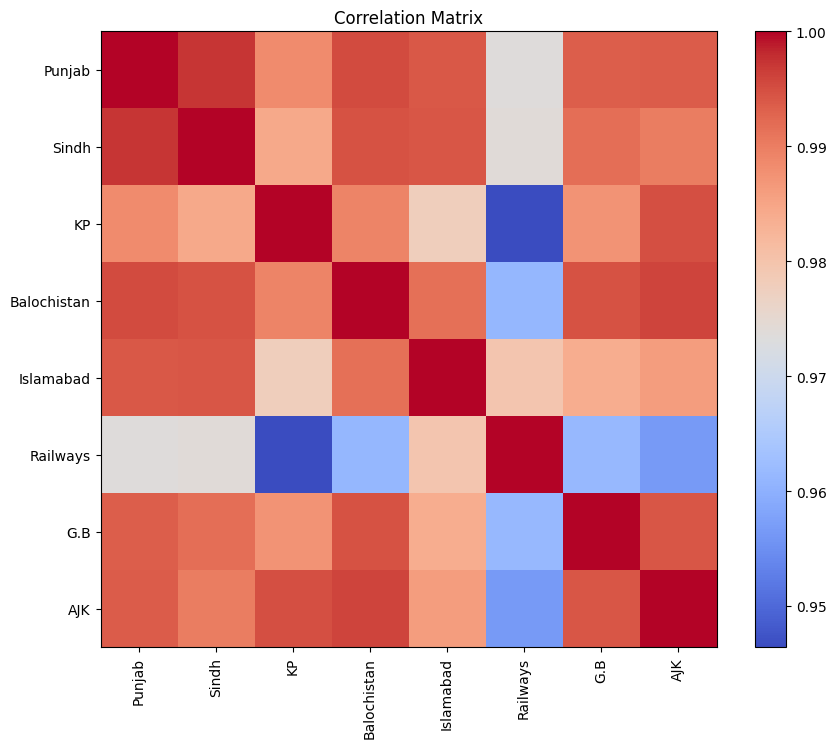

Probabilities of Different Types of Crimes in Different Regions:
Region: Punjab
  Crime Type: Murder, Probability: 0.0064
  Crime Type: Attempt to Murder, Probability: 0.0076
  Crime Type: Kidnapping /Abduction, Probability: 0.0179
  Crime Type: Dacoity, Probability: 0.0021
  Crime Type: Robbery, Probability: 0.0147
  Crime Type: Burglary, Probability: 0.0165
  Crime Type: Cattle Theft, Probability: 0.0080
  Crime Type: Other Theft, Probability: 0.0395
  Crime Type: Others, Probability: 0.3873
  Crime Type: TOTAL RECORDED CRIME, Probability: 0.5000
Region: Sindh
  Crime Type: Murder, Probability: 0.0176
  Crime Type: Attempt to Murder, Probability: 0.0183
  Crime Type: Kidnapping /Abduction, Probability: 0.0203
  Crime Type: Dacoity, Probability: 0.0069
  Crime Type: Robbery, Probability: 0.0216
  Crime Type: Burglary, Probability: 0.0100
  Crime Type: Cattle Theft, Probability: 0.0032
  Crime Type: Other Theft, Probability: 0.0179
  Crime Type: Others, Probability: 0.3842
  Crime Type

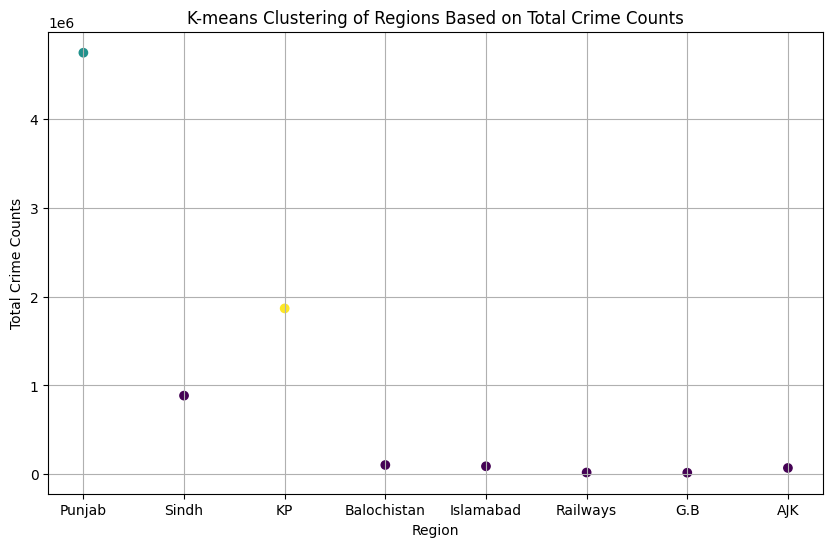

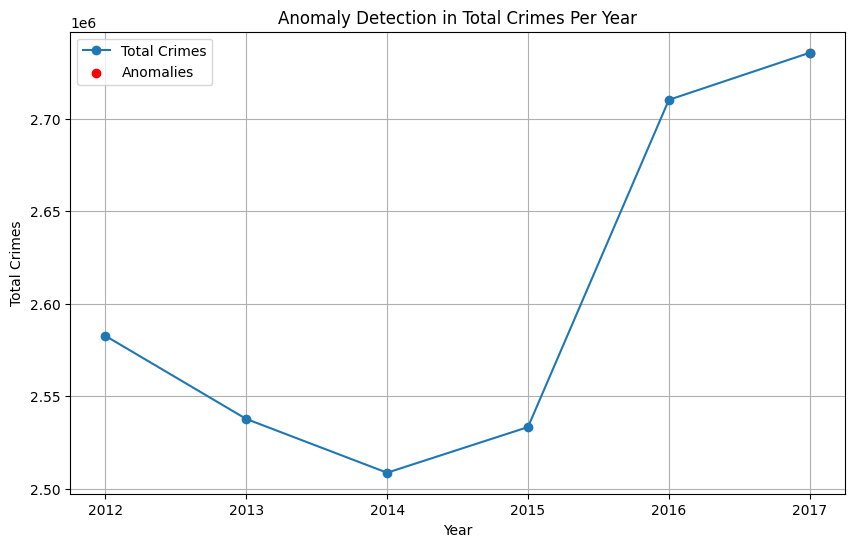

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv(r'C:\Users\Khansa Malik\Downloads\pakistan_crimes.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for the correct column names
print("Column names in the dataset:", df.columns)

# Convert 'Year' column to datetime format (using only the year)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Data Cleaning
# Handle missing values
df = df.dropna()

# Exploratory Data Analysis (EDA)
# Plot the number of crimes per year
crimes_per_year = df.groupby(df['Year'].dt.year).sum(numeric_only=True).drop(columns=['_id'])

plt.figure(figsize=(10, 6))
plt.plot(crimes_per_year.index, crimes_per_year.sum(axis=1), marker='o')
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

regions = ['Punjab', 'Sindh', 'KP', 'Balochistan', 'Islamabad', 'Railways', 'G.B', 'AJK']
# Population data for each region according to Census 2017
population_data = {
    'Punjab': 110012442,
    'Sindh': 47850000,
    'KP': 3998876,
    'Balochistan': 12300000,
    'Islamabad': 1014825,
    'Railways': 1000000,
    'G.B': 1492924,
    'AJK': 4045366
}

# Calculate crime rate per 100,000 people
crime_rate = {}
for region in regions:
    total_crimes = df[region].sum()
    population = population_data[region]
    crime_rate[region] = (total_crimes / population) * 100000

# Plot crime rate per 100,000 people
plt.figure(figsize=(12, 6))
plt.bar(crime_rate.keys(), crime_rate.values())
plt.title('Crime Rate per 100,000 People')
plt.xlabel('Region')
plt.ylabel('Crime Rate')
plt.grid(True)
plt.show()

# Crime Type Distribution with Improved Visualization for Small Screens
crime_type_distribution = df['Offence'].value_counts()

plt.figure(figsize=(12, 6))
crime_type_distribution.plot(kind='bar')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility on small screens
plt.tight_layout()  # Adjust layout to fit everything within the figure area
plt.grid(True)
plt.show()

# Yearly Comparison of Crime Types
yearly_crime_types = df.groupby([df['Year'].dt.year, 'Offence']).sum(numeric_only=True).drop(columns=['_id']).unstack(fill_value=0)

plt.figure(figsize=(12, 8))
yearly_crime_types.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Yearly Comparison of Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Crime Trends in Specific Regions
crime_type_to_analyze = input("Enter the crime you want to analyze: ")  
region_trends = df[df['Offence'] == crime_type_to_analyze].groupby([df['Year'].dt.year])[regions].sum()

plt.figure(figsize=(12, 8))
for region in regions:
    plt.plot(region_trends.index, region_trends[region], marker='o', label=region)
plt.title(f'Trends of {crime_type_to_analyze} in Different Regions')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

# Crime Rate Change Over Time
crime_rate_change = crimes_per_year.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))
plt.plot(crime_rate_change.index, crime_rate_change.sum(axis=1), marker='o')
plt.title('Percentage Change in Crime Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.tight_layout()
plt.show()

# severity scores for each crime type 
severity_scores = {
    'Murder': 10,
    'Attempt to Murder': 8,
    'Kidnapping /Abduction': 7,
    'Dacoity': 6,
    'Robbery': 5,
    
}

# Calculate total severity score for each year
df['Severity_Score'] = df['Offence'].map(severity_scores)
severity_per_year = df.groupby(df['Year'].dt.year)['Severity_Score'].sum()

plt.figure(figsize=(12, 6))
plt.plot(severity_per_year.index, severity_per_year, marker='o')
plt.title('Total Crime Severity Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Severity Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Analysis
# Calculate correlation matrix for different regions
regions = ['Punjab', 'Sindh', 'KP', 'Balochistan', 'Islamabad', 'Railways', 'G.B', 'AJK']
correlation_matrix = df[regions].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Probability Model for Crime Prediction
# Calculate the probability of different types of crimes occurring in different regions

crime_types = df['Offence'].unique()

# Calculate probabilities for each region and crime type
probabilities = {}
for region in regions:
    region_data = df[region]
    total_crimes_in_region = region_data.sum()
    probabilities[region] = {}
    for crime_type in crime_types:
        crime_count = df[df['Offence'] == crime_type][region].sum()
        probabilities[region][crime_type] = crime_count / total_crimes_in_region

# Display probabilities
print("Probabilities of Different Types of Crimes in Different Regions:")
for region, crime_probs in probabilities.items():
    print(f"Region: {region}")
    for crime_type, prob in crime_probs.items():
        print(f"  Crime Type: {crime_type}, Probability: {prob:.4f}")

# Predict the likelihood of crimes occurring in a specific region and time period
def predict_crime(region, crime_type):
    if region in probabilities and crime_type in probabilities[region]:
        return probabilities[region][crime_type]
    else:
        return 0.0

# Clustering Analysis using K-means
# We will cluster regions based on their total crime counts

# Select relevant columns for clustering (regions)
regions = ['Punjab', 'Sindh', 'KP', 'Balochistan', 'Islamabad', 'Railways', 'G.B', 'AJK']
crime_data = df[regions].sum().values.reshape(-1, 1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(crime_data)
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(regions, crime_data, c=labels, cmap='viridis')
plt.title('K-means Clustering of Regions Based on Total Crime Counts')
plt.xlabel('Region')
plt.ylabel('Total Crime Counts')
plt.grid(True)
plt.show()

#ANOMALY DETECTION
# Calculate total crimes per year
total_crimes_per_year = df.groupby(df['Year'].dt.year).sum(numeric_only=True).drop(columns=['_id']).sum(axis=1).values.reshape(-1, 1)

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=0)
anomalies = iso_forest.fit_predict(total_crimes_per_year)

# Plot the anomalies
plt.figure(figsize=(10, 6))
plt.plot(df['Year'].dt.year.unique(), total_crimes_per_year, marker='o', label='Total Crimes')
plt.scatter(df['Year'].dt.year.unique()[anomalies == -1], total_crimes_per_year[anomalies == -1], color='red', label='Anomalies')
plt.title('Anomaly Detection in Total Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.legend()
plt.grid(True)
plt.show()

In [2]:

# Example prediction
region_to_predict = 'Punjab'  # Replace with actual region from your dataset
crime_type_to_predict = 'Murder'  # Replace with actual crime type from your dataset
predicted_probability = predict_crime(region_to_predict, crime_type_to_predict)
print(f"Predicted Probability of {crime_type_to_predict} in {region_to_predict}: {predicted_probability:.4f}")



Predicted Probability of Murder in Punjab: 0.0064
